# Example – Pool Fire

## Introduction

This example illustrates the setup and analysis of a minimalistic FDS simulation. Starting from a simple pool fire with a fixed heat release rate, the model is extended by various parameters. The results are then validated by comparison with simple analytical methods.

## Setup

The scenario is a pool fire with a heat release rate of $\small\sf 1~MW$ and a surface area of $\small\sf 1~m^2$ is located centraly at the floor, i.e. $\small\sf z=0~m$. The extension of the compuatational domain is 

$$\small\sf [-2.5~m, 2.5~m] \times [-2.5~m, 2.5~m] \times [0~m, 10~m]$$ 

with a grid resolution of $\small\sf 0.2~m$.

## FDS Input File

Parameters in the FDS input file are specified by using namelist formatted records. Each namelist record begins with the ampersand character, &, followed by the name of the namelist group, then a comma-delimited list of the input parameters, and finally a forward slash /.

```{tip} Table 21.3 in the [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf) provides a summary of frequently used output quantities.  
```

A simple and commented input file that can serve as a starting point for the following exercise looks like this:

```{literalinclude} ../../../../data/pool_fire/misc/pool_fire_basic_comments.fds
```

## SMV Visualisation

The computational domain including boundary conditions, obstructions and the results for the respective output variables of the FDS simulation can be displayed with the Smokeview post-processor.

:::{figure-md} fig-pool-fire-smv-plain

<img src="figs/pool_fire_all.png" width="100%">

SMV visualisation of the geometry / the mesh-grid in the y-z-plane / the temperature values in the y-z-slice at  $\sf y=0~m$ ($\sf t=19.63~s$). The surface patch `BURNER`, which has a `HRRPUA` defined, is colored redish.  
:::

## Analysis

The following tasks are intended to provide a general understanding of how to use FDS and SmokeView. They cover the basic functions and the analysis of the simulation results. The FDS input case described above can serve as a starting point.

```{tip} Read the entire task before starting a simulation to capture multiple output parameters in a single run. 
```

## Task I – Basics

The goal of this task is to become familiar with basic functions. Use the above listed input file and extend it to your needs. 

```{tip} When adding new diagnostics or other elements, it is useful to reduce the computing time to allow for a fast turn-over-time. This way debugging or adjusting your setup will be more efficient. For pure geometrical checks, the simulaiton time can also be set to zero.  
```


**Task:**

1. Add a temperature sclice at $\small\sf y=0~m$ and watch the output via smokeview. Change the output by varying the colour scaling and crop the data at an upper and lower boundary. Create snapshots for three points in time, e.g. $\small\sf 5~s$, $\small\sf 10~s$ and $\small\sf 20~s$. Refer to section 5.2 "Data Bounds" [Smokeview User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.6/SMV_User_Guide.pdf) for more information on how to change the output properties of slices.

2. Plot the computed heat release rate (HRR) from the pool_fire_hrr.csv file against the given input HRR of the FDS file. Discuss the differences and what these are related to. Compare HRR for heat release rates of $\small\sf 100~kW$, $\small\sf 1~MW$ and $\small\sf 10~MW$.

**1. Solution**

:::{figure-md} fig-pool-fire-temp-timesteps

<img src="figs/pool_fire_temp_timesteps.png" width="100%">

Visualisation of the instanteneous `TEMPERATURE` values in the x-z-slice $\sf y=0~m$ at different timesteps ($\sf t=5.03~s$), ($\sf t=10.03~s$), ($\sf t=20.03~s$) The command `CELL_CENTERED`, prevents the values between the cell boundaries from being interpolated.
:::

:::{figure-md} fig-pool-fire-temp-bounds-trunc

<img src="figs/pool_fire_temp_bounds_trunc.png" width="100%">

Visualisation of the instanteneous `TEMPERATURE` values in the x-z-slice at $\sf y=0~m$ at ($\sf t=19.63~s$) The upper data bound is set to 1200 and 800. The data is truncated beyond 100.
:::

**2. Solution**

The fluctuation of the HRR curve increases at higher levels. A drop in the released energy with time indicates a lower oxygen level due to the sealed compartment.

In [1]:
import fdsreader
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 1
# plt.rcParams['figure.dpi'] = 150
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})

root = '../../../../'

In [2]:
data_root = root + 'data/pool_fire/100kw_sealed'
sim = fdsreader.Simulation(data_root)
plt.plot(sim.hrr["Time"], sim.hrr["HRR"], label='simulation')
t_min_max = [sim.hrr["Time"][0], sim.hrr["Time"][-1]]
hrr_prescribed = 100
plt.plot(t_min_max, [hrr_prescribed, hrr_prescribed], label='prescribed')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.xlabel("Time / s")
plt.ylabel("HRR / kW")
plt.savefig('figs/pool_fire_100kw_sealed_hrr.svg', bbox_inches='tight')
plt.close()

In [3]:
data_root = root + 'data/pool_fire/1mw_sealed'
sim = fdsreader.Simulation(data_root)
plt.plot(sim.hrr["Time"], sim.hrr["HRR"], label='simulation')
t_min_max = [sim.hrr["Time"][0], sim.hrr["Time"][-1]]
hrr_prescribed = 1000
plt.plot(t_min_max, [hrr_prescribed, hrr_prescribed], label='prescribed')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.xlabel("Time / s")
plt.ylabel("HRR / kW")
plt.savefig('figs/pool_fire_1mw_sealed_hrr.svg', bbox_inches='tight')
plt.close()

In [4]:
data_root = root + 'data/pool_fire/10mw_sealed'
sim = fdsreader.Simulation(data_root)
plt.plot(sim.hrr["Time"], sim.hrr["HRR"], label='simulation')
t_min_max = [sim.hrr["Time"][0], sim.hrr["Time"][-1]]
hrr_prescribed = 10000
plt.plot(t_min_max, [hrr_prescribed, hrr_prescribed], label='prescribed')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.xlabel("Time / s")
plt.ylabel("HRR / kW")
plt.savefig('figs/pool_fire_10mw_sealed_hrr.svg', bbox_inches='tight')
plt.close()


```{tabbed} 100 kW
<img src="figs/pool_fire_100kw_sealed_hrr.svg" width="80%">
```

```{tabbed} 1 MW
<img src="figs/pool_fire_1mw_sealed_hrr.svg" width="80%">
```

```{tabbed} 10 MW
<img src="figs/pool_fire_10mw_sealed_hrr.svg" width="80%">
```

## Task II – Mean Profiles

This task will illustrate the analysis of the simulation based on slices and devices. In addition to the heat release, the gas temperature should also be evaluated. Use again the input file with a heat release of 1 MW.

**Tasks**
1. Plot the temperature distrtibution of the plume at $\small\sf y = 0~m$ and $\small\sf z = 1.5~m$ in various ways to analyse exact cell temperatures and isothermes.

2. visualize the velcity vector field in the plume axis at $\small\sf t \approx 20~s$. Open the sealed domain on at least one side and observe the change in the flow field. 

3. Analyse the heat flux and the adiabatic surface temperature on the boundaries of the domain or an obstruction within. Plot the quantities with Smokeview or by reading the boundary files with the ***fdsreader***. Compare the results with the output of corresponding devices on top of the boundaries (Consider the devices orientation!). 


```{tip} A vector field results from the superposition of several scalar fields (e.g. u- and v-velocity). A vector slice can be generated directly by setting the SLCF attribute `VECTOR=.TRUE.`. Please refer to section 21.4 "Animated Planar Slices: The SLCF Namelist Group" of the [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf) for more information about the SLCF Namelist Group or 22.28 "(Slice file parameters)". For the output quantities please refer to 21.12 "Summary of Frequently-Used Output Quantities".
```

[comment]: <> (v_z profile along z-axis as function of HRR)

**Solution**

In [5]:
data_root = root + 'data/pool_fire/1mw_sealed'
sim = fdsreader.Simulation(data_root)
slice_temp = sim.slices[0]
time = 20
time_index = slice_temp.get_nearest_timestep(time)

plt.figure(figsize=(4,6))
plt.imshow(slice_temp[0].data[time_index].T, origin='lower', 
           extent=slice_temp[0].extent.as_list(), cmap='jet',
           vmin=20, vmax=1200)
plt.xlabel("X / m")
plt.ylabel("Z / m")
plt.colorbar(label="Temperature / $\sf ^\circ C$")
plt.savefig('figs/pool_fire_1mw_temperatures_slice.svg', bbox_inches='tight')
plt.close()



:::{figure-md} fig-pool-fire-temp-slice

<img src="figs/pool_fire_1mw_temperatures_slice.svg" width="60%">

Visualisation of the instanteneous ($\sf t=19.63~s$) `TEMPERATURE` values in the y-z-slice $\sf y=0~m$. The command `CELL_CENTERED`, prevents the values between the cell boundaries from being interpolated.
:::

In [6]:
slice_temp = sim.slices[1]
time = 20.00
time_index = slice_temp.get_nearest_timestep(time)
(n_x, n_y) = slice_temp[0].shape
x = range(n_x)
y = range(n_y)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(3,3))
plt.contourf(X,Y, slice_temp[0].data[time_index].T, origin='lower', cmap='jet')
plt.xlabel("$\sf N_{cells,x}$ / -")
plt.ylabel("$\sf N_{cells,y}$ / -")
plt.colorbar(label="Temperature / $\sf ^\circ C$")
plt.savefig('figs/pool_fire_1mw_temperatures_z_contour.svg', bbox_inches='tight')
plt.close()

:::{figure-md} fig-pool-fire-temp-contour

<img src="figs/pool_fire_1mw_temperatures_z_contour.svg" width="60%">

Visualisation of the instanteneous ($\sf t=19.63~s$) `TEMPERATURE` values in the x-z-slice $\sf y=0~m$. The plot shows the isotherms with a bandwidth of $100 K$.
:::

In [7]:
data_root = root + 'data/pool_fire/10mw_sealed'
sim = fdsreader.Simulation(data_root)# Vector Plots
time = 20
time_index = slice_temp.get_nearest_timestep(time)


slice_u = sim.slices[3][0].data[time_index]
slice_v = sim.slices[4][0].data[time_index]
n_x = slice_u.shape[0]
n_y = slice_u.shape[1]
x = range(n_x)
y = range(n_y)
X, Y = np.meshgrid(x, y)
slice_res = (slice_u**2 + slice_v**2)**1/2
plt.figure(figsize=(3,6))
plt.quiver(X,Y, slice_u.T, slice_v.T, slice_res.T,cmap='jet', clim=(0,50), scale=100)
plt.colorbar(label = "Velocity / $\sf ms^{-2}$")
plt.xlabel("$\sf N_{cells,x}$ / -")
plt.ylabel("$\sf N_{cells,y}$ / -")
plt.xticks(ticks=[0,12.5,25], labels=[-2.5,0,2.5])
plt.yticks(ticks=[0,10,20,30,40,50], labels=[0,2,4,6,8,10])
plt.xlim(0,25)
plt.savefig('figs/pool_fire_velocity_vector_sealed.svg', bbox_inches='tight')
plt.close()

In [8]:
data_root = root + 'data/pool_fire/10mw_open'
sim = fdsreader.Simulation(data_root)# Vector Plots
time = 20
time_index = slice_temp.get_nearest_timestep(time)


slice_u = sim.slices[3][0].data[time_index]
slice_v = sim.slices[4][0].data[time_index]
n_x = slice_u.shape[0]
n_y = slice_u.shape[1]
x = range(n_x)
y = range(n_y)
X, Y = np.meshgrid(x, y)
slice_res = (slice_u**2 + slice_v**2)**1/2
plt.figure(figsize=(3,6))
plt.quiver(X,Y, slice_u.T, slice_v.T, slice_res.T,cmap='jet', clim=(0,50), scale=100)
plt.colorbar(label = "Velocity / $\sf ms^{-2}$")

plt.xlabel("$\sf N_{cells,x}$ / -")
plt.ylabel("$\sf N_{cells,y}$ / -")
plt.xticks(ticks=[0,12.5,25], labels=[-2.5,0,2.5])
plt.yticks(ticks=[0,10,20,30,40,50], labels=[0,2,4,6,8,10])
plt.xlim(0,25)
plt.savefig('figs/pool_fire_velocity_vector_open.svg', bbox_inches='tight')
plt.close()


```{tabbed} 10 MW, sealed domain
<img src="figs/pool_fire_velocity_vector_sealed.svg" width="60%">
```

```{tabbed} 10 MW, open domain
<img src="figs/pool_fire_velocity_vector_open.svg" width="60%">
```

In [9]:
from fdsreader.bndf.utils import sort_patches_cartesian
data_root = root + 'data/pool_fire/bndf'
sim = fdsreader.Simulation(data_root)
obst = sim.obstructions[0]

orientation = -1
quantity = "AST"
patches = list()
for sub_obst in obst.filter_by_orientation(orientation):
    # Get boundary data for a specific quantity
    sub_obst_data = sub_obst.get_data(quantity)
    patches.append(sub_obst_data.data[orientation])

# Combine patches to a single face for plotting
patches = sort_patches_cartesian(patches)

shape_dim1 = sum([patch_row[0].shape[0] for patch_row in patches])
shape_dim2 = sum([patch.shape[1] for patch in patches[0]])
n_t = patches[0][0].n_t  # Number of timesteps

face = np.empty(shape=(n_t, shape_dim1, shape_dim2))
dim1_pos = 0
dim2_pos = 0
for patch_row in patches:
    d1 = patch_row[0].shape[0]
    for patch in patch_row:
        d2 = patch.shape[1]
        face[:, dim1_pos:dim1_pos + d1,
        dim2_pos:dim2_pos + d2] = patch.data
        dim2_pos += d2
    dim1_pos += d1
    dim2_pos = 0

t = 20
plt.figure(figsize=(4,6))
plot = plt.imshow(face[t].T, vmin=20, vmax=300, origin="lower", cmap="jet")
plt.colorbar(label="Temperature / $\sf ^\circ C$")
plt.xlabel("$\sf N_{cells,x}$ / -")
plt.ylabel("$\sf N_{cells,y}$ / -")
plt.savefig('figs/pool_fire_bndf_ast.svg', bbox_inches='tight')
plt.close()

In [10]:
orientation = -1
quantity = "NET HEAT FLUX"
patches = list()
for sub_obst in obst.filter_by_orientation(orientation):
    # Get boundary data for a specific quantity
    sub_obst_data = sub_obst.get_data(quantity)
    patches.append(sub_obst_data.data[orientation])

# Combine patches to a single face for plotting
patches = sort_patches_cartesian(patches)

shape_dim1 = sum([patch_row[0].shape[0] for patch_row in patches])
shape_dim2 = sum([patch.shape[1] for patch in patches[0]])
n_t = patches[0][0].n_t  # Number of timesteps

face = np.empty(shape=(n_t, shape_dim1, shape_dim2))
dim1_pos = 0
dim2_pos = 0
for patch_row in patches:
    d1 = patch_row[0].shape[0]
    for patch in patch_row:
        d2 = patch.shape[1]
        face[:, dim1_pos:dim1_pos + d1,
        dim2_pos:dim2_pos + d2] = patch.data
        dim2_pos += d2
    dim1_pos += d1
    dim2_pos = 0

t = 20
plt.figure(figsize=(4,6))
plot = plt.imshow(face[t].T, vmin=0, vmax=4, origin="lower", cmap="jet")
plt.colorbar(label="NHF / $\sf kW~m^{-2}$")
plt.xlabel("$\sf N_{cells,x}$ / -")
plt.ylabel("$\sf N_{cells,y}$ / -")
plt.savefig('figs/pool_fire_bndf_nhf.svg', bbox_inches='tight')
plt.close()

In [11]:
time = sim.devices['Time'].data
ast = sim.devices['AST'].data
nhf = sim.devices['NHF'].data
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.plot(ast, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Time / s')
ax1.set_ylabel("AST / $\sf ^\circ C$", color=color)


ax2 = ax1.twinx()
color = 'tab:orange'

ax2.plot(nhf, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("NHF / $\sf kW~m^{-2}$", color=color)

plt.savefig('figs/pool_fire_1mw_ast_nhf.svg', bbox_inches='tight')
plt.close()

```{tabbed} ADIABATIC SURFACE TEMPERTURE
<img src="figs/pool_fire_bndf_ast.svg" width="60%">
```
```{tabbed} NET HEAT FLUX
<img src="figs/pool_fire_bndf_nhf.svg" width="60%">
```

## Task III - Plume Formulas

This task targets the computation of the plume temperature with analytical methods in order to subsequently validate the results of an numerical simulation. For more detailed information on the theory and application of the Plume formulas, please refer to the literature, e.g. Enclosure Fire Dynamics by B. Karlsson and J. Quintiere {cite}`Karlsson.1999`.

***Heskested***

$\small\sf \Delta T $ indicates the temperature rise in the plume centerline axis the rise above ambient temperature:


$$ \small\sf
\Delta T = 9.1 \left(\frac{T_\infty}{g \cdot c_p^2 \cdot \rho_\infty^2} \right)^{1/3} \cdot \dot{Q}_c^{2/3} \cdot (z -z_0)^{-5/3}
$$

where $\sf \dot{Q}_c$ ist the convective heat release rate, $\small\sf T_\infty = 293~K$ is the ambient temperature, $\small\sf g = 9.81~ms^{-1}$ is the gravitational constant, $\small\sf \rho_\infty = 1.2 kg/m^3$ is the 
density of air at ambient temperature and $\small\sf c_p = 1.0~kJ/(kg K)$ is the specific heat capacity.

The virtual origin $z_0$ depends on the (equivalent) diameter $D$ of the fire source and the total heat release rate and is given by:

$$\small\sf
z_0 = 0.083 \cdot \dot{Q}_c^{2/5} - 1.02 \cdot D
$$

***McCaffrey***

$\small\sf \Delta T $ indicates the temperature rise in the plume centerline axis the rise above ambient temperature:

$$\small\sf
\Delta T = \left(\frac{\kappa}{0.9 \cdot \sqrt{2g}}\right)^2 \cdot \left(\frac{z}{\dot{Q}^{2/5}}\right)^{2\eta-1} \cdot T_\infty
$$

where $\small\sf \dot{Q}$ ist the total heat release rate, $\small\sf T_\infty = 293~K$ is the ambient temperature, $\small\sf g = 9.81~ms^{-1}$ is the gravitational constant, z is the hight above the virtual plume source (m). The constants $\small\sf \eta$ and $\small\sf \kappa$ vary depending on the plume regions and can be optained from the following table.

| Region       | $ \small\sf \frac{z}{\dot{Q}^{2/5}}$    | $\small\sf \eta$ | $\small\sf \kappa$           |
|--------------|---------------------|--------|-----------------------------|
| Continuous   | < 0.08           | 1/2  | $\small\sf 6.8~[m^{1/2}/s]$           |
| Intermittent | 0.08-0.2         |  0    | $\small\sf 1.9~[m/(kW^{1/5}s)]$       |
| Plume        | > 0.2            | 1/3 | $\small\sf 1.1~[m^{4/4}/(kW^{1/3}s)]$ |

**Task:**

1. Calculate the plume temperatures of the plume using the analytical approaches of the Heskested and Mccaffrey Plumes at a HRR of 1 MW at heights of $\small\sf  z = 0.5~m, 1~m, 1.5~m, 2~m, 2.5~m, 4~m$. Assume that the radiative fraction of the plume is 20 %. Compare the results and discuss the reasons for the deviations.

2. Evaluate the temperature in the plume axis for the FDS simulation by a slice file in the X-Z as well as in the Y-Z plane. Compare the temperature in the plume axis to the results of the plume formulas using temperature devices. Smooth the output of the units by a moving average to reduce noise.

```{tip} To reduce noise, temperatures calculated with FDS can be smoothed using a simple moving average (SMA). The SMA of a time series $\small\sf x(t)$ is the sequence of arithmetic averages of $\small\sf  n$ consecutive data points.
$\small\sf m_{SMA}(t) = \frac{1}{n}\sum_{t=0}^{n-1}x(t-1)$
```
**Solution:**

***McCaffrey***

```{toggle}
$\small\sf z = 1.0 m: \frac{z}{\dot{Q}^{2/5}} = \frac{1}{1000^{2/5}} = 0.063~|~0.063 < 0.008$ -> Continuous

$\small\sf z = 1.5 m: \frac{z}{\dot{Q}^{2/5}} = \frac{1.5}{1000^{2/5}} = 0.095~|~0.2 > 0.095 > 0.008$ -> Intermediate

$\small\sf z = 2.0 m: \frac{z}{\dot{Q}^{2/5}} = \frac{2.0}{1000^{2/5}} = 0.126~|~0.2 > 0.126 > 0.008$ -> Intermediate

$\small\sf z = 2.5 m: \frac{z}{\dot{Q}^{2/5}} = \frac{2.5}{1000^{2/5}} = 0.158~|~0.2 > 0.158 > 0.008$ -> Intermediate

$\small\sf z = 4.0 m: \frac{z}{\dot{Q}^{2/5}} = \frac{4.0}{1000^{2/5}} = 0.252~|~0.252 > 0.2$ -> Plume

The calculated temperatures and the respective auxiliary constants used can be found in the following table:


| $\small\sf z [m]$ | $\small\sf \frac{z}{\dot{Q}^{2/5}}[m/kW^{2/5}]$  | $\small\sf \eta$ | $\small\sf \kappa$             | $\small\sf \Delta T [\circ C]$ |
|:-------:|:--------------------------------------:|:------:|:--------------------:|:--------------------:|
| 1.0     | 0.063                                  | 1/2    | $\small\sf 6.8~m^{1/1}/s$      |          852         |
| 1.5     | 0.095                                  | 0      | $\small\sf 1.9~m/(kW^{1/5}/s)$ |          700         |
| 2.0     | 0.126                                  | 0      | $\small\sf 1.9~m/(kW^{1/5}/s)$  |          528         |
| 2.5     | 0.158                                  | 0      | $\small\sf 1.9~m/(kW^{1/5}/s)$ |          421         |
| 4.0     | 0.252                                  | -1/3   | $\small\sf 1~m/(kW^{1/3}/s)$   |          221         |
```

***Heskested***
```{toggle}
Simplifying the plumem formula into:

$\small\sf \Delta T = 9.1 \left(\frac{T_\infty}{g \cdot c_p^2 \cdot \rho_\infty^2} \right)^{1/3} \cdot \dot{Q}_c^{2/3} \cdot (z -z_0)^{-5/3} = 25 \left( \frac{\dot{Q}_c^{2/5}}{(z -z_0)}\right)^{5/3}$

The equivalent diameter:

$\small\sf D = 2 \sqrt{\frac{A}{2\pi}} = 2 \sqrt{\frac{1}{2\pi}} \approx 0.8$

The virtual plume origin:

$\small\sf z_0 = 0.083 \cdot (0.8 \cdot 1000)^{2/5} - 1.02 \cdot 0.8 \approx 0.39 m$

The plume temperature at differenyt heights:

$\small\sf z = 1.0 m:$ $\small\sf \Delta T = 25 \left( \frac{800^{2/5}}{(1 + 0.39)}\right)^{5/3} = 1244~K$


$\small\sf z = 1.5 m:$ $\small\sf  \Delta T = 25 \left( \frac{800^{2/5}}{(1.5 + 0.39)}\right)^{5/3} = 745~K$


$\small\sf z = 2.0 m:$ $\small\sf  \Delta T = 25 \left( \frac{800^{2/5}}{(2 + 0.39)}\right)^{5/3} = 504~K$

$\small\sf z = 2.5 m:$ $\small\sf  \Delta T = 25 \left( \frac{800^{2/5}}{(2.5 + 0.39)}\right)^{5/3} = 367~K$

$\small\sf z = 4.0 m:$ $\small\sf  \Delta T = 25 \left( \frac{800^{2/5}}{(4.0 + 0.39)}\right)^{5/3} = 183~K$
```

***FDS Devices***

In [12]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


def ma (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma
d_t_hesk_list = [1244, 745, 504, 367, 183]
d_t_mcf_list = [852, 700, 528, 421, 221]
color_list = ['b', 'c', 'g', 'r', 'y']
data_root = root + 'data/pool_fire/1mw_open'
sim = fdsreader.Simulation(data_root)
devc_list = [1.0, 1.5, 2.0, 2.5, 4.0]
window = 100
for z, d_t_hesk, d_t_mcf, c in zip(devc_list, d_t_hesk_list, d_t_mcf_list, color_list):
    time = sim.devices['Time'].data
    temperature = sim.devices[f'T_{z}'].data
#     plt.scatter(time, temperature, s=1, alpha=0.1, color=c)
    plt.plot(ma(time, window), ma(temperature, window), label=f"z = {z}", color=c)
    plt.axhline(y=d_t_hesk+20, color=c, linestyle='dashed')
    plt.axhline(y=d_t_mcf+20, color=c, linestyle='dotted')
    plt.annotate(f"$\sf z={z}~m$", xy=(30, d_t_hesk-50),  color=c, annotation_clip=False)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.xlabel("Time / s")
plt.ylabel("Temperature / $\sf ^\circ C$")
line_fds = Line2D([0], [0], color='black', linestyle='-')
line_hesk = Line2D([0], [0], color='black', linestyle='dashed')
line_mcf = Line2D([0], [0], color='black', linestyle='dotted')
plt.legend([line_fds, line_hesk, line_mcf], ["FDS", "Heskestad", "MCCaffrey"])

plt.savefig('figs/pool_fire_1mw_open_temperatures_devc.svg', bbox_inches='tight')
plt.close()

:::{figure-md} fig-pool-fire-hrr

<img src="figs/pool_fire_1mw_open_temperatures_devc.svg" width="80%">

Moving average of `TEMPERATURE` devices at heights 1.0, 1.5, 2.0, 2.5, 4.0 m, smoothed over 100 datapoints.
:::

## Task IV – Time-dependent Heat Release Rate

This task deals with the different possibilities to define the heat release rate (HRR) of a design fire and to model it in FDS. The total heat release  $\dot{Q}$ of a burning area $\small\sf A_{fire}$ depends on the heat release rate per unit area $\dot{q}''$:

$$\dot{Q} = {A_{Fire} \cdot \dot{q}''}$$
In FDS a bunring area is defined by a `VENT` with a certain surface proberty that can be assigned by a `SURF_ID`. A fixed heat release rate per unit area can be set to a `SURF` by the attribute `HRRPUA`. Please refer to sectoion 10.2.1 "Basics" of the [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf) for rurther information.

```{tip} Create an automation in Python or Excel that outputs the strings of the RAMP lines for the FDS input file.  
```

**Task:**

1. Model the HRR progression for a radially spreading fire with a maximum power of 1 MW in FDS assuming a fixed burning area (task a) and a radial propagation from the center of the burning area (task b).


    1. The HRR according to the 't-square' model can be described by:
    
        $$\small\sf \dot Q = \alpha \cdot t^2$$
        where t is the  burning time after ignition and $\small\sf \alpha$ is the fire growth factor.Assume a fast fire propagation by $\small\sf \alpha = 0.04689~kW/s^2$ and a **constant** heat release rate per unit area of $\small\sf  \dot{q}'' = 0.25~MW/m^2$. The maximum burning area is $\small\sf  A_{fire} = 1~m^2$. First calculate the time until the fire has spread to the entire area. This corresponds to the time at which the maximum HRR is reached. For simplicity, assume a perfect radial fire spread and a round fire area. Then model the temporal evolution of the energy release in FDS via a `RAMP` function (See section 20.6 "Controlling a Ramp" of the [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf) ).
    
    2. Model the fire propagation directly in FDS by defining the spread rate. The `SPREAD` attributes denotes a constant radial propagation speed from a specified point.
    :::{figure-md} fig-pool-fire-spread

    <img src="figs/pool_fire_spread.svg" width="30%">

    Fire propagation via FDS `SPREAD` attribute
    :::
    For instructions on how to model a radial fire spread in FDS, please refer to the F[FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf) Section 11.4.2 "Special Topic: A Radially-Spreading Fire". The radial propagation speed v can be obtained from the fire area $\small\sf A_{Fire}$ and the corresponding burning period t.
    
    $$\small\sf v = \frac{\sqrt{A_{fire}/\pi}}{t}$$

    3. Compare the HRR curves calculated by FDS with each other and discuss the limitations and inaccuracies associated with each approach.


    
    


2. Given is the fictional mass loss of a heptane fire. Calculate the heat release of the fire over the entire burning period with an assumed effective heat of combustion $\small\sf  \Delta h_{c,eff} = 44,590~kJ / kg$. Model the HRR in FDS by using the RAMP function. Check if the simulated curve matches the prescribed HRR. The effective heat of combustion indicates the heat release per unit of weight of a material in combustion. For simplicity, assume that the averaged mass loss between two time steps applies to the end of each time interval. 
The mass loss caused by the burn-up can be described by the following time-dependent correlation:
    ```
    time_index = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275 ] # [s]
    total_mass = [4000, 4000, 3600, 3040, 2880, 2400, 1800, 1120, 600, 160, 0, 0] # [g]
     ```

**1. Solution**
```{toggle}
The burning period for the fire to reach the maximum heat release is:

$$
t = \frac{\dot{q}'' \cdot A_{Fire}}{\alpha} = \frac{250 \cdot 1}{0.04689} \approx 73~s
$$

By setting the time and fraction parameters `T` and `F`, the `RAMP` function is obtained as follows:

    &SURF ID = 'BURNER', HRRPUA = 250, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /
    &VENT XB = -0.5,0.5, -0.5,0.5, 0.0, 0.0, SURF_ID='BURNER' /
    &RAMP ID='fireramp', T=0, F=0.00
    .
    .
    .
    &RAMP ID='fireramp', T=73, F=1.00

The spread rate corresponds to the propagation speed in m/s:

$$
\small\sf v = \frac{\sqrt{A_{fire}/\pi}}{t} = \frac{\sqrt{1/\pi}}{73} = 0.00773 m/s
$$

Starting from the center of the vent, the radial propagation of the fire in FDS can be described as follows:

    &SURF ID = 'BURNER', HRRPUA = 250, COLOR = 'RASPBERRY' /
    &VENT XB = -0.5,0.5, -0.5,0.5, 0.0, 0.0, SURF_ID='BURNER', SPREAD_RATE = 0.00773 /
```

In [13]:
alpha = 0.04689
Qdot_max = 250
t = (Qdot_max / alpha)**(1/2)
print(t)
print(f"&SURF ID = 'BURNER', HRRPUA = {Qdot_max}, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /")
for t in range(0, 74):
    Qdot = alpha * t **2
    
    print(f"&RAMP ID='fireramp', T={t}, F={Qdot / Qdot_max:.2f}")

73.01799238972059
&SURF ID = 'BURNER', HRRPUA = 250, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /
&RAMP ID='fireramp', T=0, F=0.00
&RAMP ID='fireramp', T=1, F=0.00
&RAMP ID='fireramp', T=2, F=0.00
&RAMP ID='fireramp', T=3, F=0.00
&RAMP ID='fireramp', T=4, F=0.00
&RAMP ID='fireramp', T=5, F=0.00
&RAMP ID='fireramp', T=6, F=0.01
&RAMP ID='fireramp', T=7, F=0.01
&RAMP ID='fireramp', T=8, F=0.01
&RAMP ID='fireramp', T=9, F=0.02
&RAMP ID='fireramp', T=10, F=0.02
&RAMP ID='fireramp', T=11, F=0.02
&RAMP ID='fireramp', T=12, F=0.03
&RAMP ID='fireramp', T=13, F=0.03
&RAMP ID='fireramp', T=14, F=0.04
&RAMP ID='fireramp', T=15, F=0.04
&RAMP ID='fireramp', T=16, F=0.05
&RAMP ID='fireramp', T=17, F=0.05
&RAMP ID='fireramp', T=18, F=0.06
&RAMP ID='fireramp', T=19, F=0.07
&RAMP ID='fireramp', T=20, F=0.08
&RAMP ID='fireramp', T=21, F=0.08
&RAMP ID='fireramp', T=22, F=0.09
&RAMP ID='fireramp', T=23, F=0.10
&RAMP ID='fireramp', T=24, F=0.11
&RAMP ID='fireramp', T=25, F=0.12
&RAMP ID='fireramp', T=26, F=0

In [14]:
data_root = root + 'data/pool_fire/ramp_spread/rundir'
sim = fdsreader.Simulation(data_root)
plt.plot(sim.hrr["Time"], sim.hrr["HRR"], label='FDS SPREAD')
t_min_max = [sim.hrr["Time"][0], sim.hrr["Time"][-1]]

data_root = root + 'data/pool_fire/ramp_tsquare'
sim = fdsreader.Simulation(data_root)
plt.plot(sim.hrr["Time"], sim.hrr["HRR"], label='FDS RAMP')
t_min_max = [sim.hrr["Time"][0], sim.hrr["Time"][-1]]

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.xlabel("Time / s")
plt.ylabel("HRR / kW")
plt.savefig('figs/pool_fire_10mw_sealed_hrr_spread.svg', bbox_inches='tight')
plt.close()

:::{figure-md} fig-pool-fire-hrr-spread

<img src="figs/pool_fire_10mw_sealed_hrr_spread.svg" width="80%">

Simulated `HRR` generated by `RAMP` and `SPREAD` as a function of time.
:::

**2. Solution**
```{toggle}
The HRR can be obtained from the mass loss $\small\sf \dot{m_{fuel}}$ by the following expression:
$$\small\sf \dot{Q} = \Delta h_{c,eff} \dot{m_{fuel}}$$

The maximum 

    &SURF ID = 'BURNER', HRRPUA = 1212.85, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /
    &RAMP ID='fireramp', T=0, F=0.00 /
    &RAMP ID='fireramp', T=25, F=0.15 /
    &RAMP ID='fireramp', T=50, F=0.59 /
    &RAMP ID='fireramp', T=75, F=0.68 /
    &RAMP ID='fireramp', T=100, F=0.35 /
    &RAMP ID='fireramp', T=125, F=0.59 /
    &RAMP ID='fireramp', T=150, F=0.88 /
    &RAMP ID='fireramp', T=175, F=1.00 /
    &RAMP ID='fireramp', T=200, F=0.76 /
    &RAMP ID='fireramp', T=225, F=0.65 /
    &RAMP ID='fireramp', T=250, F=0.24 /
    &RAMP ID='fireramp', T=275, F=0.00 /


```

In [19]:
time_list = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275 ]
mass_list = [4000, 3900, 3500, 3040, 2800, 2400, 1800, 1120, 600, 160, 0, 0]
mlr_list = np.diff(mass_list)/np.diff(time_list) # mass loss rate

huc = 44590 # Effective heat of combustion huc = 44590 KJ / kg
hrr_list =abs(mlr_list/1000*huc) # calculate HRR from mass loss
hrr_list = np.concatenate(([0], hrr_list)) # add 0 mass at first timestep
print(hrr_list)
print(f"&SURF ID = 'BURNER', HRRPUA = {max(hrr_list):.2f}, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /")
for time, hrr in zip(time_list, hrr_list):
    print(f"&RAMP ID='fireramp', T={time}, F={hrr/max(hrr_list):.2f} /")

[   0.     178.36   713.44   820.456  428.064  713.44  1070.16  1212.848
  927.472  784.784  285.376    0.   ]
&SURF ID = 'BURNER', HRRPUA = 1212.85, RAMP_Q = 'fireramp', COLOR = 'RASPBERRY' /
&RAMP ID='fireramp', T=0, F=0.00 /
&RAMP ID='fireramp', T=25, F=0.15 /
&RAMP ID='fireramp', T=50, F=0.59 /
&RAMP ID='fireramp', T=75, F=0.68 /
&RAMP ID='fireramp', T=100, F=0.35 /
&RAMP ID='fireramp', T=125, F=0.59 /
&RAMP ID='fireramp', T=150, F=0.88 /
&RAMP ID='fireramp', T=175, F=1.00 /
&RAMP ID='fireramp', T=200, F=0.76 /
&RAMP ID='fireramp', T=225, F=0.65 /
&RAMP ID='fireramp', T=250, F=0.24 /
&RAMP ID='fireramp', T=275, F=0.00 /


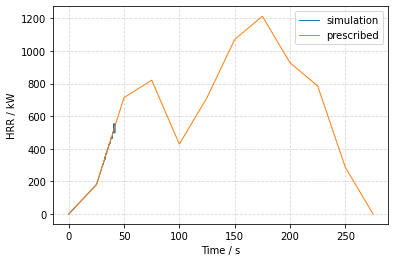

In [26]:
# Plot HRR from Simulation
data_root = root + 'data/pool_fire/ramp_heptane/rundir'
sim = fdsreader.Simulation(data_root)
plt.plot(sim.hrr["Time"], sim.hrr["HRR"], label='simulation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Time / s")
plt.ylabel("HRR / kW")
# Plot prescribed data
plt.plot(time_list, hrr_list, label = 'prescribed')
plt.legend(loc='best')
plt.savefig('figs/pool_fire_hrr_heptane_ramp.svg', bbox_inches='tight')
# plt.close()

:::{figure-md} fig-pool-fire-hrr-ramp

<img src="figs/pool_fire_hrr_heptane_ramp.svg" width="80%">

Prescribed and simulated `HRR` of n-heptane fire as a function of time. The heat release can be derived from the mass loss the effective heat of combustion $\small\sf \Delta h_{c,eff}$.
:::

## Task V – Grid Convergence / HPC computing / Benchmarking

This task deals with the monitoring of simulation parameters such as computation time and the convergence of numerical solutions. 

**Task:**

1. Increase / decrease the grid resolution by factors of 0.4 and 2. Monitor the computing time by evaluating the .out file.

2. Extend the examination by refining the grid by a factor of 4 and 8, using resources of parallel computing. For this purpose subdivide the computational domain into several meshes.

3. Analyse the computation time for assigning multible cores to a single OpenMP process. Split the computational domain into different meshes and assign individual MPI processes to each of them. Try to combine MPI and OpenMP and evaluate the increase in performance.

4. Check grid convergence for the respective resolutions of the domain based on temperature and velocity criteria

**Solution:**

In [ ]:
import pandas as pd
data_root = root + 'data/pool_fire/gc_3_1/rundir'
caselist = ['gc_1_1', 'gc_1_2', 'gc_1_3', 'gc_2_1', 'gc_2_2', 'gc_2_3', 'gc_3_1', 'gc_3_2', 'gc_3_3' ]
bm_dict = {}
for case in caselist:
    case_dict = {}
    data_root = root + f'data/pool_fire/{case}/rundir'
    sim = fdsreader.Simulation(data_root)
    case_dict['devc_temp'] = sim.devices[f'T_{1.0}'].data
    case_dict['sim_time'] = sim.devices['Time'].data
    case_dict['total_time'] = sim.cpu['Total T_USED (s)\n'][0]
    out_file = sim.out_file_path
    with open(out_file, 'r') as file:
        for line in file:
            if 'Total Number of Grid Cells' in line:
                case_dict['n_cells'] = int(line.split('Cells')[-1])
            if 'Number of OpenMP Threads:' in line:
                case_dict['n_open_mp'] = int(line.split('Number of OpenMP Threads:')[-1])
            if 'Number of MPI Processes:' in line:
                case_dict['n_mpi']= int(line.split('Number of MPI Processes:')[-1])
    
    bm_dict[case] = case_dict
bm_df = pd.DataFrame(bm_dict).T

for n_open_mp in [1,2,4]:
    df = bm_df[bm_df['n_open_mp']==n_open_mp]
    plt.plot(df['n_cells'], df['total_time'], label=f"$\sf N_{{openMP}}$ = {n_open_mp}")
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("$\sf N_{{cells}}$ / -")
plt.ylabel("Time / s")
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.savefig('figs/pool_fire_benchmarking.svg', bbox_inches='tight')

In [ ]:
window = 10
for n_cells in [2000, 31250, 250000]:
    time = bm_df[bm_df['n_cells']==n_cells].iloc[0]['sim_time']
    temp = bm_df[bm_df['n_cells']==n_cells].iloc[0]['devc_temp']
    plt.plot(movingaverage(time, window), movingaverage(temp, window), label=f"$\sf N_{{cells}}$ = {n_cells}")
    plt.grid(True, which="both", linestyle='--', alpha=0.5)
    plt.legend(loc='lower right')
plt.xlabel("Time / s")
plt.ylabel("Temperature / $\sf ^\circ C$")
plt.savefig('figs/pool_fire_grid_convergence.svg', bbox_inches='tight')
plt.close()

:::{figure-md} fig-pool-fire-benchmarking

<img src="figs/pool_fire_benchmarking.svg" width="80%">

Total computation time as a function of the total number of grid cells in the computational domain ( $\sf N_{cells}$ ) for different amount of openMP processes ($\sf N_{openMP}$). 
:::
 

:::{figure-md} fig-pool-fire-grid-convergence

<img src="figs/pool_fire_grid_convergence.svg" width="80%">

Checking grid convergence for a device with quantity `TEMPERATURE` at XYZ (0, 0, 1). A grid size of 20 cm and below, which results in a total number of 31250 cells, does not show any significant change in temperature.
:::